In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 构造一元二次曲线形状的数据
np.random.seed(0)
x = np.linspace(-5, 5, 100)
y = 2 * x**2 + 3 * x + 1 + np.random.normal(0, 10, 100)  # 添加噪声

# 转换为PyTorch张量
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

Epoch [100/1000], Loss: 90.8745
Epoch [200/1000], Loss: 88.7313
Epoch [300/1000], Loss: 88.1376
Epoch [400/1000], Loss: 87.6791
Epoch [500/1000], Loss: 87.2963
Epoch [600/1000], Loss: 86.9757
Epoch [700/1000], Loss: 86.7071
Epoch [800/1000], Loss: 86.4821
Epoch [900/1000], Loss: 86.2936
Epoch [1000/1000], Loss: 86.1357


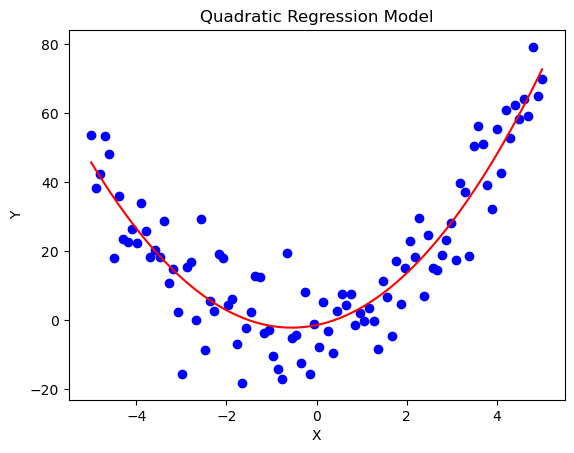

In [3]:
# 定义二次回归模型
class QuadraticRegressionModel(nn.Module):
    def __init__(self):
        super(QuadraticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # 输入特征数为2，因为x和x^2都需要作为输入

    def forward(self, x):
        x_squared = x**2  # 计算x的平方
        x_with_squared = torch.cat((x, x_squared), 1)  # 将x和x^2合并为一个输入
        return self.linear(x_with_squared)

# 实例化模型
model = QuadraticRegressionModel()

# 定义损失函数（均方误差）
criterion = nn.MSELoss()

# 选择优化器（梯度下降）
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 测试模型
with torch.no_grad():
    predicted = model(x_tensor)
    
# 绘制原始数据点和拟合的一元二次曲线
plt.scatter(x, y, color='blue')  # 绘制原始数据点
plt.plot(x, predicted.numpy(), color='red')  # 绘制拟合的一元二次曲线
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Regression Model')
plt.show()